# Step 1 :  Import Library and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Read the data in
df = pd.read_csv(r"C:\Users\admin\Documents\admission.csv")

In [3]:
df.head(5)  

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Step 2 : Data Pre-Processing

### Univariate Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df.drop('Serial No.', axis = 1, inplace = True)

<AxesSubplot:>

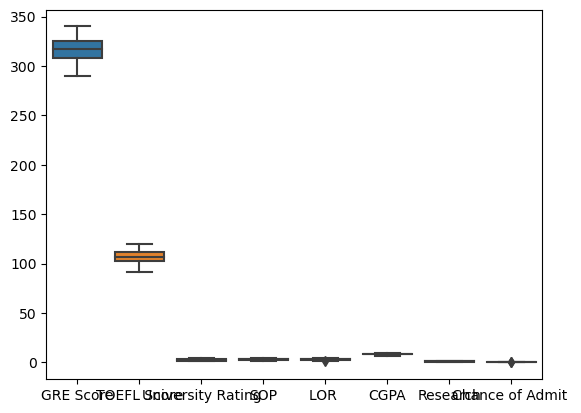

In [6]:
sns.boxplot(data = df)

In [7]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


### Checking Missing Value

In [8]:
# Do we have NA's in data
df.isna().sum()  ## is = check & as = convert

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [9]:
df.rename(columns={'LOR ': 'letter_of_recommendation', 'Chance of Admit ': 'Chance_of_Admit'}, inplace=True)

# a) Visualize the 10 random rows of the data set

In [10]:
sample = df.sample(n = 10) #for getting 10 random values 
sample

,GRE Score,TOEFL Score,University Rating,SOP,letter_of_recommendation,CGPA,Research,Chance_of_Admit
157,309,104,2,2.0,2.5,8.26,0,0.65
386,302,101,2,2.5,3.5,7.96,0,0.46
127,319,112,3,2.5,2.0,8.71,1,0.78
458,312,100,1,3.0,3.0,8.53,1,0.69
50,313,98,3,2.5,4.5,8.30,1,0.76
210,325,108,4,4.5,4.0,9.06,1,0.79
256,309,99,3,4.0,4.0,8.56,0,0.76
297,320,120,3,4.0,4.5,9.11,0,0.86
173,323,113,4,4.0,4.5,9.23,1,0.89
43,332,117,4,4.5,4.0,9.10,0,0.87


<AxesSubplot:>

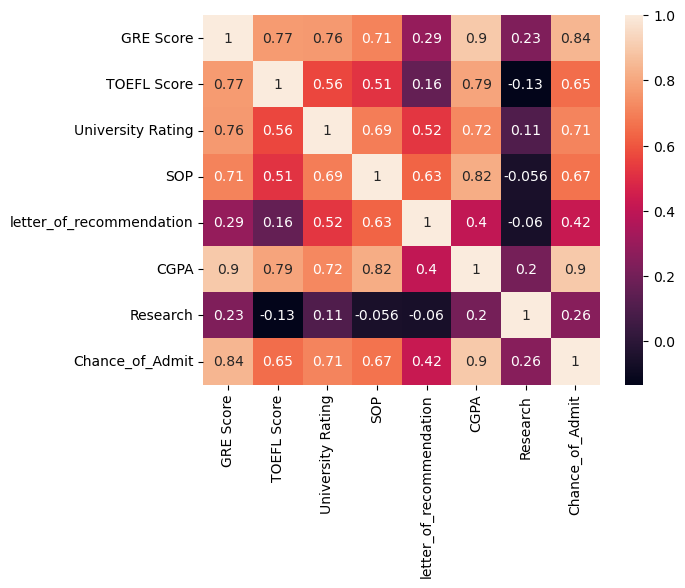

In [11]:
sns.heatmap(sample.corr(),annot = True)

here we can see that there is a correlation between chance of admit and GRE Score 

## b) Generate the description for numeric variables

In [12]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,letter_of_recommendation,CGPA,Research,Chance_of_Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


## c) Check the shape of the data set

In [13]:
df.shape

(500, 8)

Data have 500 row and 8 Columns

## d) Generate the correlation matrix

<AxesSubplot:>

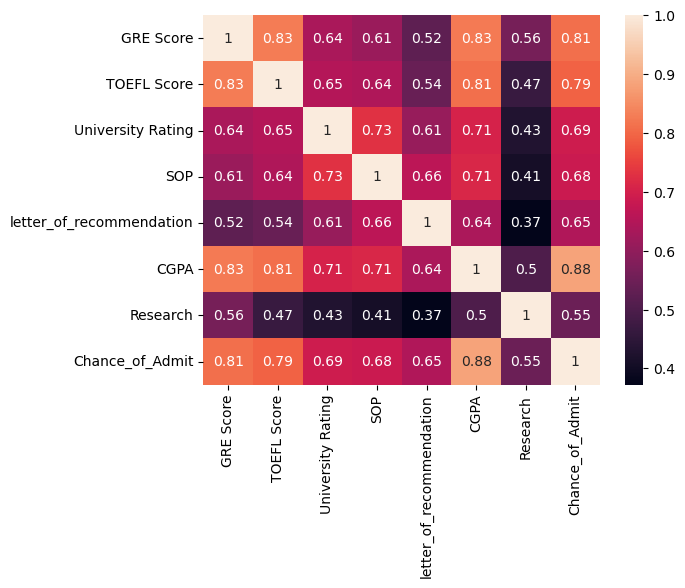

In [14]:
sns.heatmap(df.corr(),annot = True)

there is a relationship between chance+of_Admit and CGPA

## e) Generate a correlogram

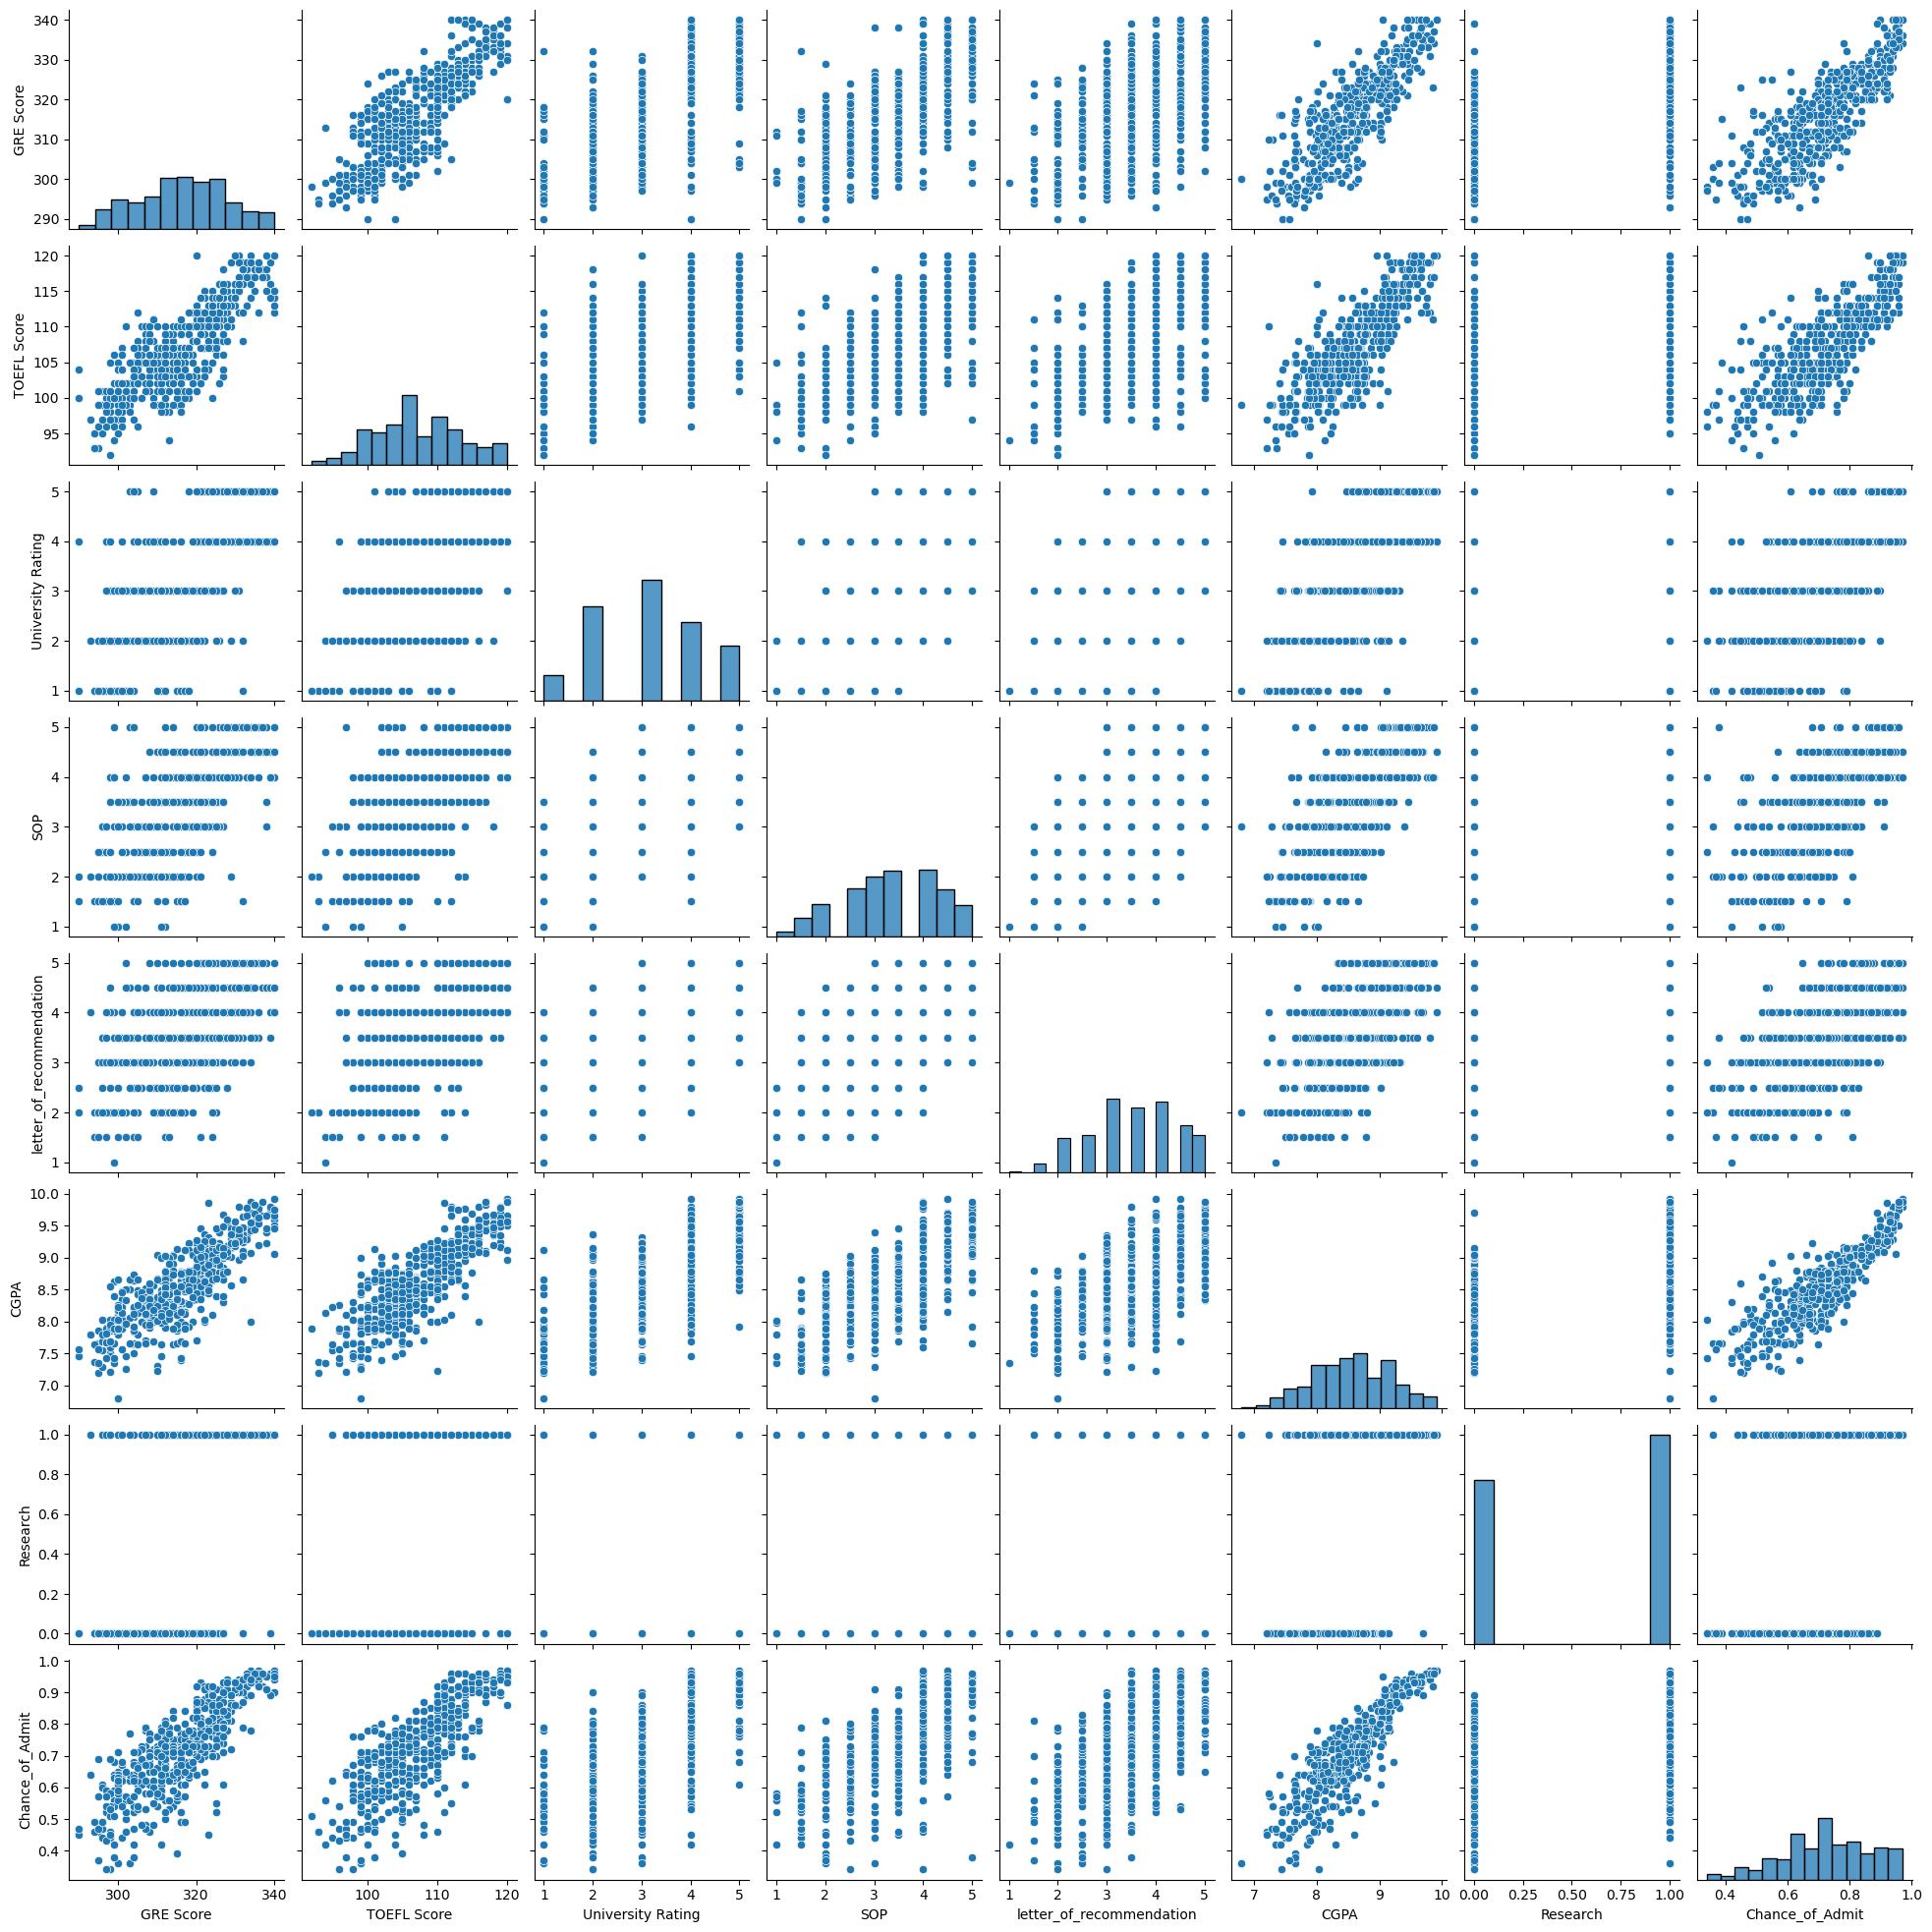

In [15]:
sns.pairplot(df)

## Q2. Find out the minimum and maximum values for GRE score

In [159]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,letter_of_recommendation,CGPA,Research
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000


In [16]:
df['GRE Score'].min() #min GRE Score got by Student is 290

290

In [17]:
df['GRE Score'].max() # #max GRE Score got by Student is 340

340

## Q.3 Find out the percentage of universities for each university rating

In [18]:
pie = df['University Rating'].value_counts()

<AxesSubplot:ylabel='University Rating'>

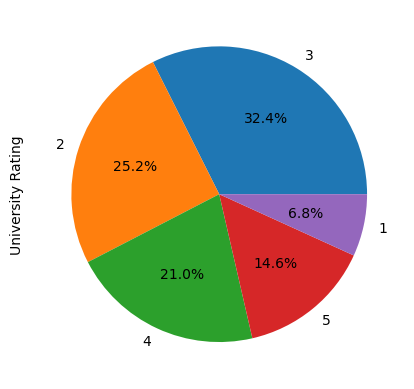

In [19]:
pie.plot.pie(autopct="%.1f%%")

University Rating 1 has 6.8%
University Rating 2 has 25.2%
University Rating 3 has 32.4%
University Rating 4 has 21%
University Rating 5 has 14.6%

## Q.4 Convert the target variable “Chance of Admit” to categorical having values 0 and 1,such that :
### Students having the “Chance of Admit” value > 0.80, are assigned value 1.
### Students having the “Chance of Admit” value < 0.80, are assigned value 0
### Where 0: Low chance of Admission and 1: High chance of admission

In [21]:
for i in df['Chance_of_Admit']:
    if i >= 0.80:
        df['Chance_of_Admit'].replace(i, 'High', inplace = True)
    else:
        df['Chance_of_Admit'].replace(i, 'Low', inplace = True)

In [22]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,letter_of_recommendation,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,High
1,324,107,4,4.0,4.5,8.87,1,Low
2,316,104,3,3.0,3.5,8.00,1,Low
3,322,110,3,3.5,2.5,8.67,1,High
4,314,103,2,2.0,3.0,8.21,0,Low


### Converting Quantity Variable to Number

In [23]:
# #Admission Numeric columns
Quantitative_Variable = df[df.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Variable.head(3)

,GRE Score,TOEFL Score,University Rating,SOP,letter_of_recommendation,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1


In [24]:
Qualitative_Variable=[]

In [25]:
for i in df['Chance_of_Admit']:
    if i == 'High':
        Qualitative_Variable.append(1)
    else:
        Qualitative_Variable.append(0)

In [26]:
Qualitative_Variable = pd.DataFrame(Qualitative_Variable)

In [27]:
Qualitative_Variable.rename(columns = {0 : 'Chance_of_Admit'}, inplace = True)

In [28]:
final_combined = pd.concat([Quantitative_Variable, Qualitative_Variable],axis=1)
final_combined.head()

,GRE Score,TOEFL Score,University Rating,SOP,letter_of_recommendation,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,0
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


# Step 3: Data Partition

In [29]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
x = final_combined.drop(['Chance_of_Admit'],axis=1)
y = final_combined[['Chance_of_Admit']]

# Train test split

X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=45)

# DECISION TREE

# Step 4: Model Building

In [30]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier()  # by default it use Gini index for split
#Train the model using the training sets
dt.fit(X_train,y_train)  # Model = dt

DecisionTreeClassifier()

# Step 5: Plotting the Tree 

In [31]:
train=pd.concat([y_train,X_train],axis=1)
train.head()

,Chance_of_Admit,GRE Score,TOEFL Score,University Rating,SOP,letter_of_recommendation,CGPA,Research
499,1,327,113,4,4.5,4.5,9.04,0
3,1,322,110,3,3.5,2.5,8.67,1
348,0,302,99,1,2.0,2.0,7.25,0
436,0,310,110,1,1.5,4.0,7.23,1
146,0,315,105,3,2.0,2.5,8.48,0


In [32]:
independent_variable = list(train.columns[1:])
independent_variable

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'letter_of_recommendation',
 'CGPA',
 'Research']

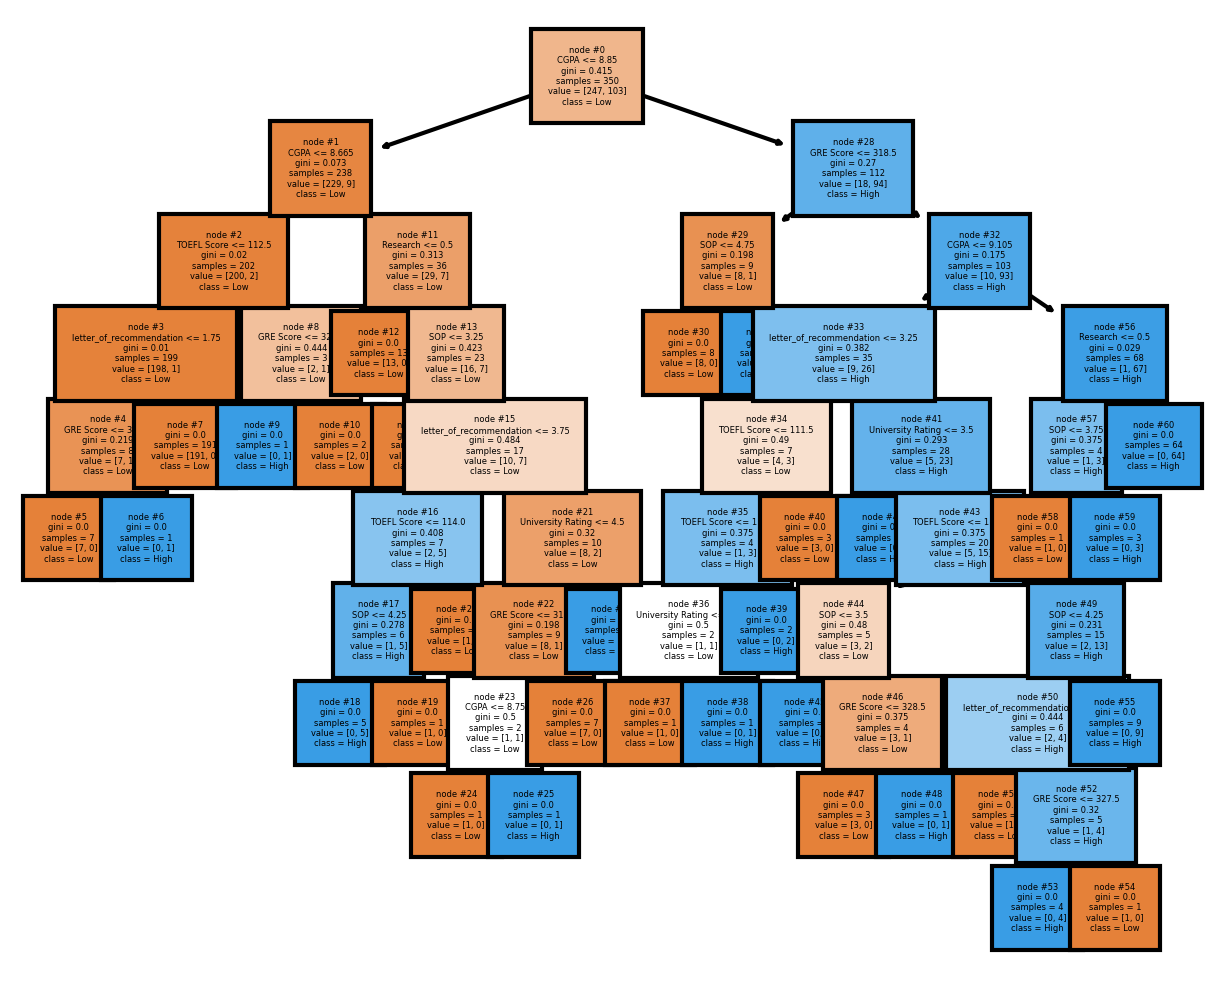

In [33]:
from sklearn import tree
import matplotlib.pyplot as plt

Chance_of_Admit=['Low', 'High']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names=Chance_of_Admit, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2); # 
#fig.savefig('imagename.png')

# Step 6 : Predictions on Train Dataset

In [34]:
train.head()

,Chance_of_Admit,GRE Score,TOEFL Score,University Rating,SOP,letter_of_recommendation,CGPA,Research
499,1,327,113,4,4.5,4.5,9.04,0
3,1,322,110,3,3.5,2.5,8.67,1
348,0,302,99,1,2.0,2.0,7.25,0
436,0,310,110,1,1.5,4.0,7.23,1
146,0,315,105,3,2.0,2.5,8.48,0


In [35]:
train['Predicted']=dt.predict(X_train) 
train.head()

,Chance_of_Admit,GRE Score,TOEFL Score,University Rating,SOP,letter_of_recommendation,CGPA,Research,Predicted
499,1,327,113,4,4.5,4.5,9.04,0,1
3,1,322,110,3,3.5,2.5,8.67,1,1
348,0,302,99,1,2.0,2.0,7.25,0,0
436,0,310,110,1,1.5,4.0,7.23,1,0
146,0,315,105,3,2.0,2.5,8.48,0,0


# Step 7 : Model Performance Metrics

In [96]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['Chance_of_Admit'])
print(matrix)

[[245   1]
 [  2 102]]


#### Final accuracy of Model Before Pruning 

In [97]:
Accuracy_Train=((245+102)/(350)*100)
print(Accuracy_Train)   # overfit or High accuracy

99.14285714285714


In [98]:
from sklearn.metrics import classification_report
print(classification_report(train['Chance_of_Admit'], train['Predicted']))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       247
           1       0.98      0.99      0.99       103

    accuracy                           0.99       350
   macro avg       0.99      0.99      0.99       350
weighted avg       0.99      0.99      0.99       350



### Model Improvement by Pruning Method ( Cut Tree)

In [99]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='gini',  #splitter   # bydefault gini is assigned if not mentioned.
                                 min_samples_leaf=40, ## child
                                 min_samples_split=6, #parent 
                                 max_depth=4)  #branches
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=40, min_samples_split=6)

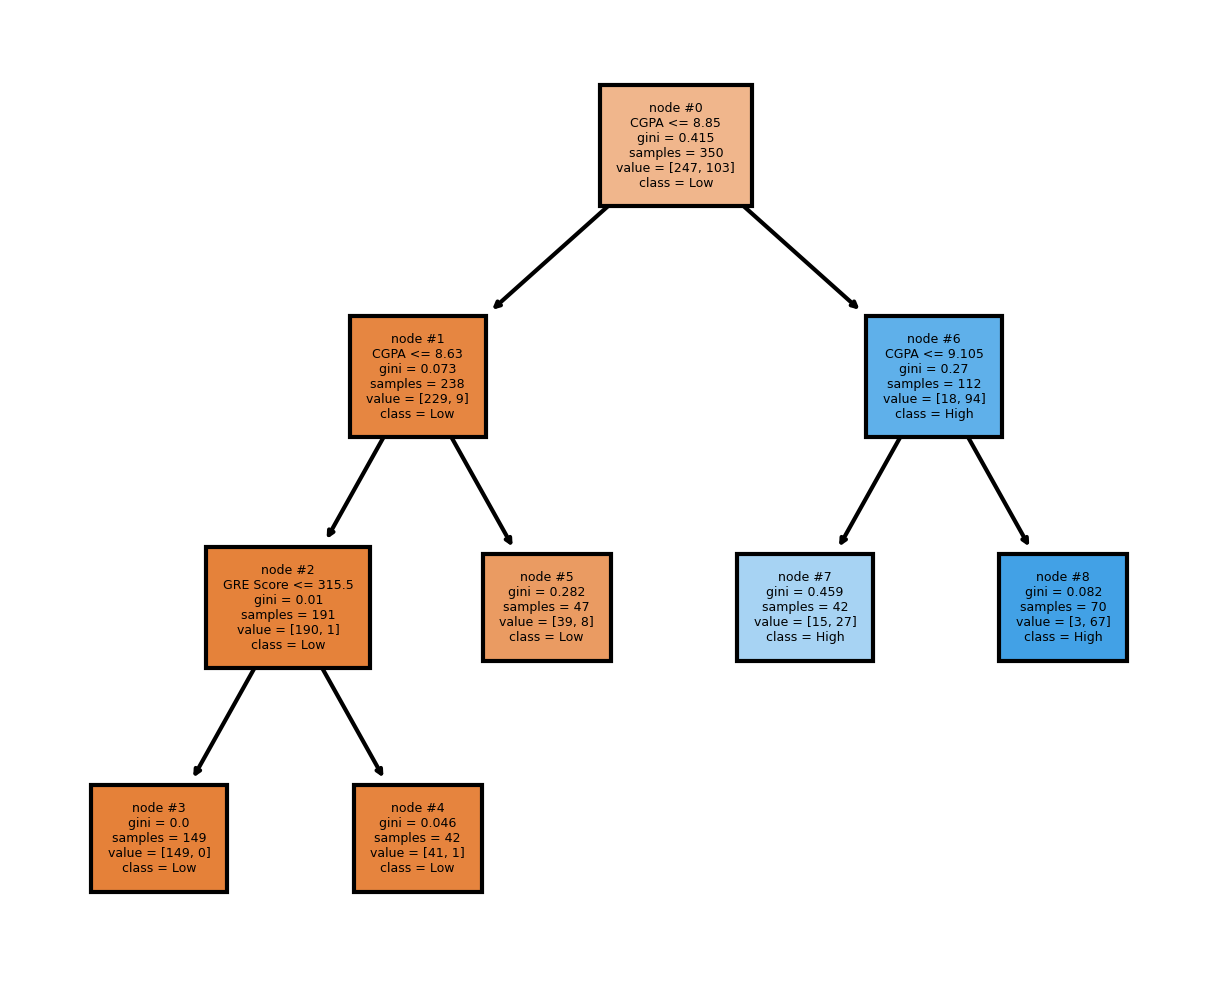

In [100]:
from sklearn import tree
import matplotlib.pyplot as plt

Chance_of_Admit=['Low', 'High']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names=Chance_of_Admit, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=3); # 
#fig.savefig('imagename.png')

In [101]:
train['Predicted']=dt.predict(X_train)  # MODEL = dt
train.head()

,GRE Score,TOEFL Score,University Rating,SOP,letter_of_recommendation,CGPA,Research,Chance_of_Admit,Predicted
499,327,113,4,4.5,4.5,9.04,0,1,1
3,322,110,3,3.5,2.5,8.67,1,1,0
348,302,99,1,2.0,2.0,7.25,0,0,0
436,310,110,1,1.5,4.0,7.23,1,0,0
146,315,105,3,2.0,2.5,8.48,0,0,0


#### Final accuracy of Model after Pruning 

In [102]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['Chance_of_Admit'])
print(matrix)

[[229   9]
 [ 18  94]]


In [103]:
Accuracy_Train=((229+94)/(350)*100)
print(Accuracy_Train)

92.28571428571428


In [104]:
from sklearn.metrics import classification_report
print(classification_report(train['Chance_of_Admit'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       247
           1       0.84      0.91      0.87       103

    accuracy                           0.92       350
   macro avg       0.90      0.92      0.91       350
weighted avg       0.93      0.92      0.92       350



# Step 8 : Predictions on Test Dataset

In [105]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,GRE Score,TOEFL Score,University Rating,SOP,letter_of_recommendation,CGPA,Research,Chance_of_Admit
204,298,105,3,3.5,4.0,8.54,0,0
481,323,107,4,3.0,2.5,8.48,1,0
296,310,107,3,3.5,3.5,8.67,0,0
38,304,105,1,3.0,1.5,7.50,0,0
298,330,114,3,4.5,4.5,9.24,1,1


In [106]:
test['Predicted']=dt.predict(X_test)
test.head()

,GRE Score,TOEFL Score,University Rating,SOP,letter_of_recommendation,CGPA,Research,Chance_of_Admit,Predicted
204,298,105,3,3.5,4.0,8.54,0,0,0
481,323,107,4,3.0,2.5,8.48,1,0,0
296,310,107,3,3.5,3.5,8.67,0,0,0
38,304,105,1,3.0,1.5,7.50,0,0,0
298,330,114,3,4.5,4.5,9.24,1,1,1


# Step 9 : Model Performance Metrics on Test data 

In [107]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['Chance_of_Admit'])
print(confusion_matrix)

[[90  4]
 [ 8 48]]


In [108]:
Accuracy_test=((90 + 48)/(150)*100)
Accuracy_test

92.0

# Sensitivity & Specificity

#### Train

In [109]:
from sklearn.metrics import classification_report
print(classification_report(train['Chance_of_Admit'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       247
           1       0.84      0.91      0.87       103

    accuracy                           0.92       350
   macro avg       0.90      0.92      0.91       350
weighted avg       0.93      0.92      0.92       350



#### Test

In [110]:
from sklearn.metrics import classification_report
print(classification_report(test['Chance_of_Admit'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        98
           1       0.86      0.92      0.89        52

    accuracy                           0.92       150
   macro avg       0.91      0.92      0.91       150
weighted avg       0.92      0.92      0.92       150



# Grid Search Method 

In [111]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = { 'min_samples_split': [40, 80, 60], ## Parent 
           'min_samples_leaf': [10,20,30], ## Child or Leave 
           'max_depth':[5,8, 10]}  # Branches
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              params, 
                              verbose=1, 
                              cv=10)
grid_search_cv.fit(X_train, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [5, 8, 10],
                         'min_samples_leaf': [10, 20, 30],
                         'min_samples_split': [40, 80, 60]},
             verbose=1)

100,50,3  # first Combination
100,50,4  # Second Combination
100,50,6 # Third Combination
100,70,3 
100,70,4
100,70,6
150,30,4
150,30,5
150,30,6
150,50,4
150,50,5
150,50,6

In [112]:
grid_search_cv.best_estimator_ 

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=40,
                       random_state=42)

# RANDOM FOREST

In [113]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
Model = RandomForestClassifier(n_estimators=10, # make 10 tress
                               criterion="gini",
                               max_depth=4,  # each tree will have 4 branches
                               min_samples_split=60,# each tree will have parent node
                               min_samples_leaf=4,# each tree will have Child node
                               max_features="sqrt")# n_estimators means number tree we want  

Model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=60, n_estimators=10)

# Importance Features

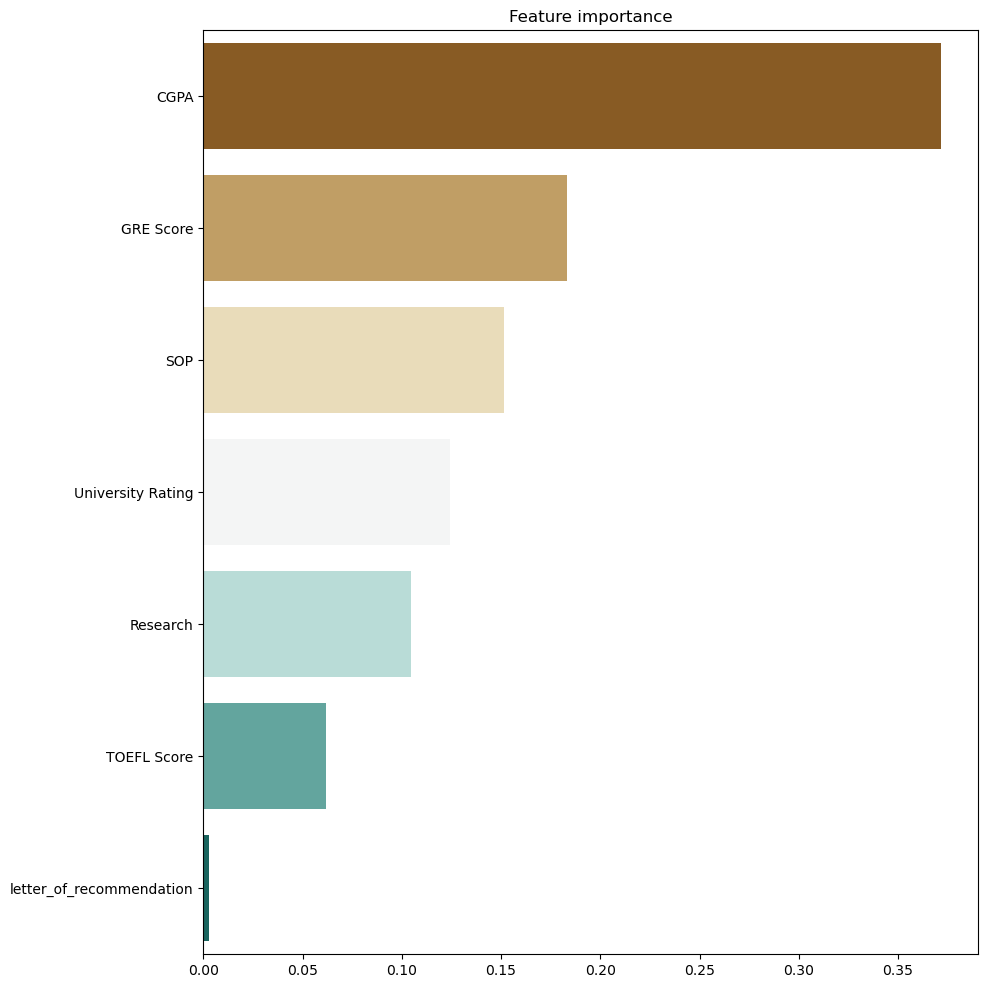

In [114]:
imp = pd.Series(data=Model.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="BrBG", orient='h')

In [115]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [116]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

In [117]:
list(x.columns)

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'letter_of_recommendation',
 'CGPA',
 'Research']

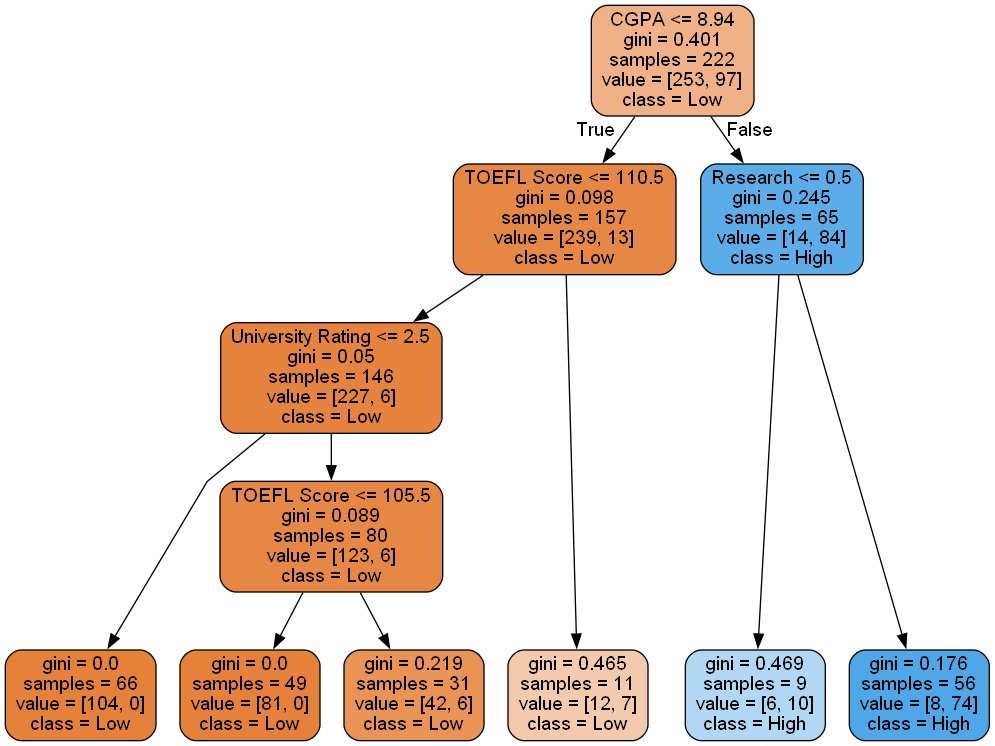

In [119]:
tree = Model.estimators_[8]  # specify the tree number   
Chance_of_Admit=['Low','High'] 
feature_list = list(x.columns)  # all independent variable name

export_graphviz(tree, out_file = 'abc.dot', 
                feature_names = feature_list, 
                leaves_parallel=True,
                class_names=Chance_of_Admit,
                rounded = True, 
                filled=True)
# Use dot file to create a graph
(graph,)= pydot.graph_from_dot_file('abc.dot')
# Write graph to a png file
graph.write_png('tree.png')
from IPython.display import Image
Image(filename = 'tree.png')

# Predictions on Train Dataset

In [120]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,GRE Score,TOEFL Score,University Rating,SOP,letter_of_recommendation,CGPA,Research,Chance_of_Admit
499,327,113,4,4.5,4.5,9.04,0,1
3,322,110,3,3.5,2.5,8.67,1,1
348,302,99,1,2.0,2.0,7.25,0,0
436,310,110,1,1.5,4.0,7.23,1,0
146,315,105,3,2.0,2.5,8.48,0,0


In [121]:
train['Predicted']=Model.predict(X_train)
train.head()

,GRE Score,TOEFL Score,University Rating,SOP,letter_of_recommendation,CGPA,Research,Chance_of_Admit,Predicted
499,327,113,4,4.5,4.5,9.04,0,1,1
3,322,110,3,3.5,2.5,8.67,1,1,0
348,302,99,1,2.0,2.0,7.25,0,0,0
436,310,110,1,1.5,4.0,7.23,1,0,0
146,315,105,3,2.0,2.5,8.48,0,0,0


# Model Performance Metrics

In [122]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['Chance_of_Admit'], train['Predicted'])
print(confusion_matrix)

[[235  12]
 [ 14  89]]


In [123]:
Accuracy_Train=((235 + 89)/(350)*100)
print(Accuracy_Train)

92.57142857142857


In [124]:
from sklearn.metrics import classification_report
print(classification_report(train['Chance_of_Admit'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       247
           1       0.88      0.86      0.87       103

    accuracy                           0.93       350
   macro avg       0.91      0.91      0.91       350
weighted avg       0.93      0.93      0.93       350



#  Predictions on Test Dataset

In [125]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,GRE Score,TOEFL Score,University Rating,SOP,letter_of_recommendation,CGPA,Research,Chance_of_Admit
204,298,105,3,3.5,4.0,8.54,0,0
481,323,107,4,3.0,2.5,8.48,1,0
296,310,107,3,3.5,3.5,8.67,0,0
38,304,105,1,3.0,1.5,7.50,0,0
298,330,114,3,4.5,4.5,9.24,1,1


In [126]:
test['Predicted']=Model.predict(X_test)
test.head()

,GRE Score,TOEFL Score,University Rating,SOP,letter_of_recommendation,CGPA,Research,Chance_of_Admit,Predicted
204,298,105,3,3.5,4.0,8.54,0,0,0
481,323,107,4,3.0,2.5,8.48,1,0,0
296,310,107,3,3.5,3.5,8.67,0,0,0
38,304,105,1,3.0,1.5,7.50,0,0,0
298,330,114,3,4.5,4.5,9.24,1,1,1


# Model Performance Metrics on Test data 

In [127]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['Chance_of_Admit'])
print(confusion_matrix)

[[92  6]
 [ 6 46]]


In [128]:
Accuracy_test=((92 + 46)/(150)*100)
Accuracy_test

92.0

In [68]:
from sklearn.metrics import classification_report
print(classification_report(test['Chance_of_Admit'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93        98
           1       0.88      0.87      0.87        52

    accuracy                           0.91       150
   macro avg       0.91      0.90      0.90       150
weighted avg       0.91      0.91      0.91       150



#### Confusion Matrix on Train

In [129]:
print(classification_report(train['Chance_of_Admit'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       247
           1       0.88      0.86      0.87       103

    accuracy                           0.93       350
   macro avg       0.91      0.91      0.91       350
weighted avg       0.93      0.93      0.93       350



# GRADIENT BOOSTING

In [130]:
from sklearn.ensemble import AdaBoostClassifier  
from sklearn.ensemble import GradientBoostingClassifier  
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import warnings  
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder

# Model  -GBM (Gradient boosting)

In [131]:
# Define Model parameters to tune
# n_estimators=The number of boosting stages to perform.
model_parameters = {'n_estimators': [5,10,15], # number of tress
                    'max_depth':    [3, 4, 5],      # maximum branches in tree
                    'learning_rate':[0.8, 0.6],
                    'min_samples_leaf':[30,50,80], ## child
                    'min_samples_split':[10,20,30]} #parent 

In [132]:

# Gridsearch the parameters to find the best parameters.
model = GradientBoostingClassifier(random_state=10,loss="deviance",criterion="mse")
## random_state  -- The random number seed so that same random numbers are generated every time.

gscv_GBM = GridSearchCV(estimator=model, 
                    param_grid=model_parameters,  # comibnation = 4
                    cv=5,  # K-fold = 10 or 5  
                    verbose=1, ### message how many task done at backend
                    n_jobs=-1, ## parallel processing used entire processor
                    scoring='accuracy') ## accuracy evaluation

gscv_GBM.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(criterion='mse',
                                                  random_state=10),
             n_jobs=-1,
             param_grid={'learning_rate': [0.8, 0.6], 'max_depth': [3, 4, 5],
                         'min_samples_leaf': [30, 50, 80],
                         'min_samples_split': [10, 20, 30],
                         'n_estimators': [5, 10, 15]},
             scoring='accuracy', verbose=1)

In [133]:
print('The best parameter are -', gscv_GBM.best_params_)

The best parameter are - {'learning_rate': 0.8, 'max_depth': 3, 'min_samples_leaf': 80, 'min_samples_split': 10, 'n_estimators': 10}


In [134]:
# Re-fit the model with the best parameters
final_mod_GBM = GradientBoostingClassifier(**gscv_GBM.best_params_)
final_mod_GBM.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.8, min_samples_leaf=80,
                           min_samples_split=10, n_estimators=10)

# Prediction on Train Data


In [135]:
train_pred = final_mod_GBM.predict(X_train)
test_pred = final_mod_GBM.predict(X_test)

In [136]:
train_pred

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,

# Confusion Matrix Train Data ( Model)

In [137]:
print('Classification report for train data is : \n',
      classification_report(y_train, train_pred))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       247
           1       0.89      0.90      0.89       103

    accuracy                           0.94       350
   macro avg       0.92      0.93      0.92       350
weighted avg       0.94      0.94      0.94       350



# Confusion Matrix Test Data ( Model) 

In [138]:
print('Classification report for test data is : \n',
      classification_report(y_test, test_pred))

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.96      0.91      0.93        98
           1       0.84      0.92      0.88        52

    accuracy                           0.91       150
   macro avg       0.90      0.92      0.91       150
weighted avg       0.92      0.91      0.91       150



# Importance Feature

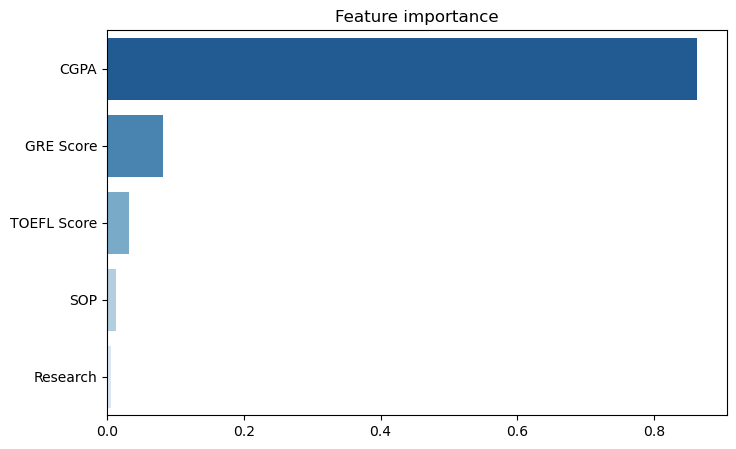

In [139]:
# Plot features importances
imp = pd.Series(data=final_mod_GBM.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(8,5))
plt.title("Feature importance")
ax = sns.barplot(y=imp.head().index, x=imp.head().values, palette="Blues_r", orient='h')


# Gradiant Boosting Tree

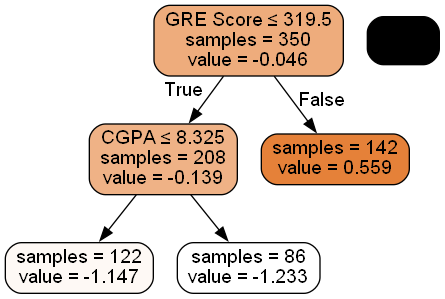

In [140]:
from sklearn.tree import export_graphviz
sub_tree = final_mod_GBM.estimators_[1, 0] #0 to 99  # Model ( Final_mod_GBM) = Give Tree
Chance_of_Admit =['Low','High']
feature_list = list(x.columns)

# Visualization. Install graphviz in your system
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(sub_tree,
    out_file=None,
    class_names=Chance_of_Admit,
    feature_names = feature_list, 
    filled=True, 
    rounded=True,
    special_characters=True,
    impurity=False)

graph = graph_from_dot_data(dot_data)
Image(graph.create_png())


# Extreme Boosting

In [141]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [142]:
from sklearn.ensemble import AdaBoostClassifier  
from sklearn.ensemble import GradientBoostingClassifier  
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import warnings  
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder 
import xgboost as xgb
from xgboost.sklearn import XGBClassifier # Extrame GB
from xgboost import plot_importance ## Plotting Importance Variables 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder # Labeling the columns with 0 & 1
from xgboost import XGBClassifier

In [143]:
# Define Model parameters to tune
# n_estimators=The number of boosting stages to perform.
model_parameters = {'n_estimators': [20, 30, 40], # number of tress
                    'max_depth':    [3,5],      # maximum branches in tree
                    'learning_rate':[0.8, 0.6],
                    'reg_lambda':[0,1]} #parent 

In [144]:
# Gridsearch the parameters to find the best parameters. Using L2 penalty
model = XGBClassifier()   # Lamda = 0 
gscv = GridSearchCV(estimator=model, 
                    param_grid=model_parameters, 
                    cv=5, 
                    verbose=1, 
                    n_jobs=-1,
                    scoring='accuracy')

gscv.fit(X_train, y_train)  ## Model building

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                   

In [145]:
print('The best parameter are -', gscv.best_params_)

The best parameter are - {'learning_rate': 0.8, 'max_depth': 3, 'n_estimators': 20, 'reg_lambda': 1}


In [146]:
# Re-fit the model with the best parameters
final_mod = XGBClassifier(**gscv.best_params_)
final_mod.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.8, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=20, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [147]:
parent_node = {'shape':'box',
               'style':'filled,rounded',
                'fillcolor' :'#78cbec'}
child_node = {'shape':'box',
               'style':'filled',
                'fillcolor' :'#e48038'}

In [152]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


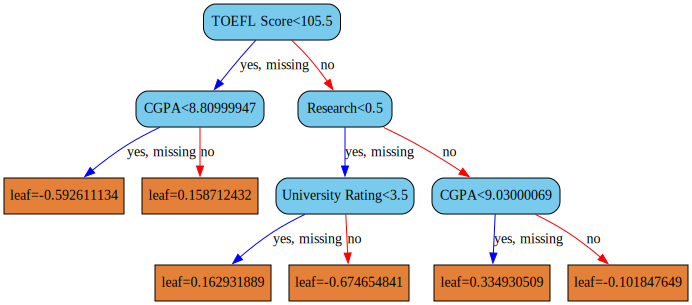

In [153]:
xgb.to_graphviz(final_mod,num_trees=6,size="5,5",   # Tree = 5 
               condition_node_params=parent_node,
               leaf_node_params=child_node)

# Accuracy of Train

In [154]:
train=pd.concat([X_train,y_train],axis=1)
train['Predicted']=final_mod.predict(X_train)  # MODEL = Final_mod
train.head()

,GRE Score,TOEFL Score,University Rating,SOP,letter_of_recommendation,CGPA,Research,Chance_of_Admit,Predicted
499,327,113,4,4.5,4.5,9.04,0,1,1
3,322,110,3,3.5,2.5,8.67,1,1,1
348,302,99,1,2.0,2.0,7.25,0,0,0
436,310,110,1,1.5,4.0,7.23,1,0,0
146,315,105,3,2.0,2.5,8.48,0,0,0


In [155]:
print('Classification report for train data is : \n',
      classification_report(y_train, train['Predicted']))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       247
           1       0.98      0.99      0.99       103

    accuracy                           0.99       350
   macro avg       0.99      0.99      0.99       350
weighted avg       0.99      0.99      0.99       350



# Accuracy of Test

In [156]:
test=pd.concat([X_test,y_test],axis=1)
test['Predicted']=final_mod.predict(X_test)  # MODEL = Final_mod
test.head()

,GRE Score,TOEFL Score,University Rating,SOP,letter_of_recommendation,CGPA,Research,Chance_of_Admit,Predicted
204,298,105,3,3.5,4.0,8.54,0,0,0
481,323,107,4,3.0,2.5,8.48,1,0,0
296,310,107,3,3.5,3.5,8.67,0,0,0
38,304,105,1,3.0,1.5,7.50,0,0,0
298,330,114,3,4.5,4.5,9.24,1,1,1


In [157]:
print('Classification report for test data is : \n',
      classification_report(y_test, test['Predicted']))

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.94      0.93      0.93        98
           1       0.87      0.88      0.88        52

    accuracy                           0.91       150
   macro avg       0.90      0.91      0.90       150
weighted avg       0.91      0.91      0.91       150



# Importance Feature

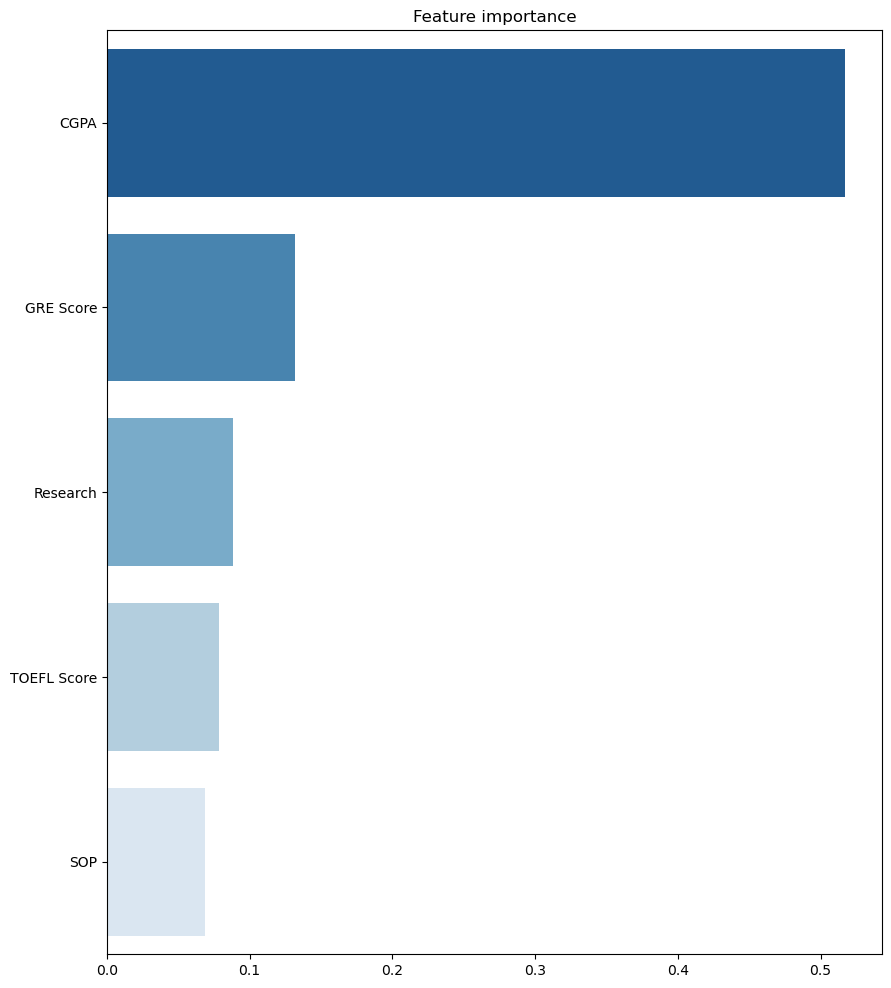

In [158]:
# Plot features importances
imp = pd.Series(data=final_mod.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.head().index, x=imp.head().values, palette="Blues_r", orient='h')

# Q.8 Compare all of the models and justify your choice about the optimum model. 

Accuracy of each model :

1) Decision Tree: Train  = 92, Test   = 92

2) Random Forest: Train  = 93, Test   = 92 

3) Gradient Boosting: Train = 94, Test = 91 

4) Xtreme Boosting : Train = 99, Test = 91

* Decision Tree is a optimum model, as it has high accuracy and model is not complex like other models.
* Decision tree has only one tree whit is giving a best Accuracy as compare to others.
* Hence we can conclude that we can predict wheather students have high chance/low chance for getting admitted in the         perticular university. 


# FINISH